In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skew, norm

## Exporting the processed train and test datasets

In [2]:
train = pd.read_csv(r"E:\processed_train.csv")
test = pd.read_csv(r"E:\processed_test.csv")

## Separating Target and Predictor Variables

In [3]:
target = train["SalePrice"]

In [4]:
target.shape

(1460,)

In [5]:
predictor = train.drop(columns=["SalePrice"])

In [6]:
predictor.shape

(1460, 295)

In [7]:
# Basic Regressors from Sklearn.
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score

In [8]:
# Advanced Regressors.
import shap
from xgboost import XGBRegressor
from catboost import Pool
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor

## Creating RMSE Metric and Setting K Folds for Cross Validation

In [9]:
def cv_rmse(model):
    return np.sqrt(-cross_val_score(model, predictor, target, scoring="neg_mean_squared_error", cv=kf))

In [10]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

## Linear Regression

In [11]:
lr_model = LinearRegression()
lr_model.fit(predictor, target)
target_pred = lr_model.predict(predictor)
MSE_train = np.mean((target_pred - target)**2)

print(f"Mean Squared Error = {MSE_train}\n")
print(f"RMSE score for Linear Regression: {cv_rmse(lr_model)}\n")
print(f"Cross Validation Score: {cv_rmse(lr_model).mean()}\n")
print(f"R2 Score for Linear Regression: {r2_score(target, target_pred)}")

Mean Squared Error = 0.00841589254971963

RMSE score for Linear Regression: [0.11437027 0.14297525 0.11281036 0.12779341 0.15471659 0.19620431
 0.15478572 0.11236875 0.14628298 0.08817823]

Cross Validation Score: 0.13504858647462045

R2 Score for Linear Regression: 0.9472200672628266


In [12]:
# Visualizing the model.

Text(0.5, 1.0, 'Prices vs. Predicted Prices')

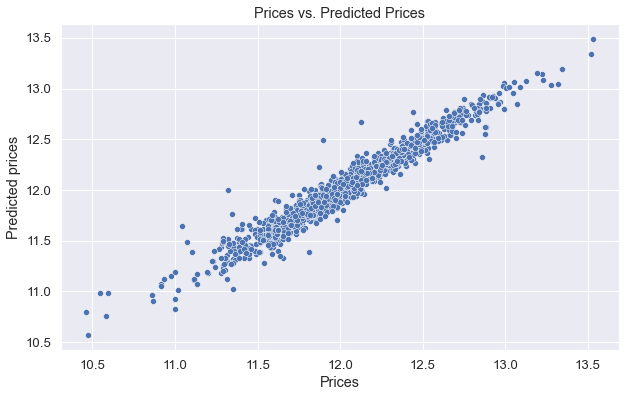

In [13]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.scatterplot(x=target, y=target_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

Text(0, 0.5, 'Residuals')

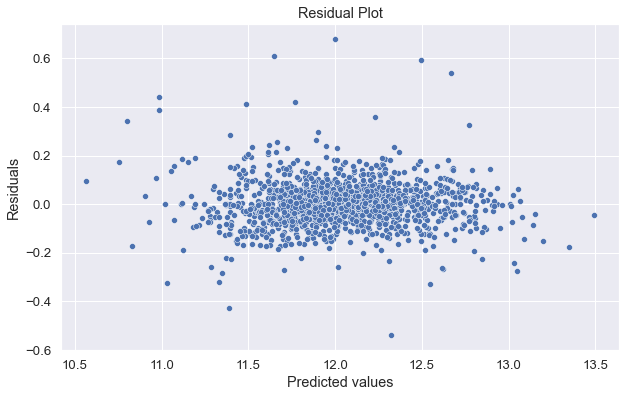

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=target_pred, y=target_pred - target)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

## Elastic Net Regression

In [15]:
param_grid = {'alpha':[0.004,0.0045,0.0035,0.01],
              'l1_ratio':[0.075, 0.065, 0.076,0.077]}

base_elastic_model = ElasticNet(max_iter=1000000)

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=2)

grid_model.fit(predictor,target)

score = cv_rmse(grid_model)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.3s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.3s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.4s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.3s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.5s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.3s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.4s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.4s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.4s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.5s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.2s
[CV] END ........................alpha=0.004, 

[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.1s
[CV] END ...................

[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.0s
[CV] END ...................

[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.1s
[CV] END ...................

[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ...................

[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.077; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.1s
[CV] END ...................

[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.2s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.076; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.3s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.3s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.3s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.4s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.1s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.3s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.2s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.1s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.2s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.1s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.2s
[CV] END .........................alpha=0.01, l1_ratio=0.075; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.2s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.076; total time=   0.1s
[CV] END ...................

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.2s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.2s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.075; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.065; total time=   0.2s
[CV] END ........................alpha=0.004, 

[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.0s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0035, l1_ratio=0.077; total time=   0.0s
[CV] END ...................

[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.065; total time=   0.1s
[CV] END ...................

[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.077; total time=   0.0s
Fitting 10 folds for each of

[CV] END .......................alpha=0.0035, l1_ratio=0.075; total time=   0.5s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.4s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.3s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.4s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.3s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.3s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.065; total time=   0.2s
[CV] END .......................alpha=0.0035, l1_ratio=0.076; total time=   0.1s
[CV] END ...................

[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.0s
[CV] END ........................alpha=0.004, l1_ratio=0.077; total time=   0.1s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.0s
[CV] END .......................alpha=0.0045, l1_ratio=0.075; total time=   0.0s
[CV] END ...................

[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.065; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.076; total time=   0.0s
[CV] END ...................

In [16]:
grid_model.best_params_

{'alpha': 0.0035, 'l1_ratio': 0.065}

In [17]:
target_pred = grid_model.predict(predictor)
MSE_train = np.mean((target_pred - target)**2)

print(f"Mean Squared Error = {MSE_train}\n")
print(f"RMSE score for ElasticNet Regression: {score}\n")
print(f"Cross Validation Score for ElasticNet Regression: {score.mean()}\n")
print(f"R2 Score for ElasticNet Regression: {r2_score(target, target_pred)}")

Mean Squared Error = 0.012010856235048538

RMSE score for ElasticNet Regression: [0.10643871 0.14396337 0.10520254 0.12303263 0.14312025 0.17562214
 0.12765607 0.10494732 0.12681683 0.08565194]

Cross Validation Score for ElasticNet Regression: 0.12424518075548338

R2 Score for ElasticNet Regression Regression: 0.9246743966303561


In [18]:
# Visualizing the model.

Text(0.5, 1.0, 'Prices vs. Predicted Prices')

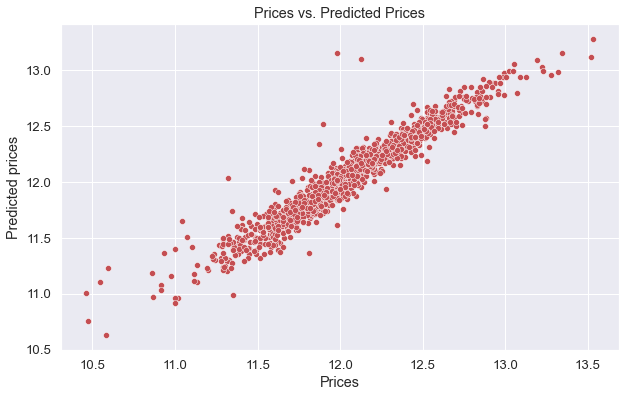

In [19]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.scatterplot(x=target, y=target_pred, color="r")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

Text(0, 0.5, 'Residuals')

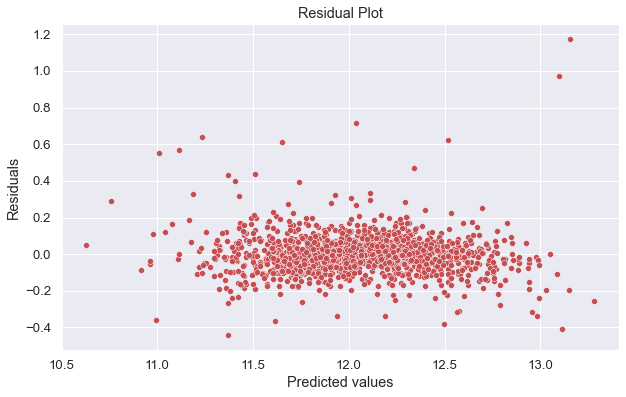

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=target_pred, y=target_pred - target, color="r")
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")